# Week 04

## Images

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this week's exercises

In [1]:
!wget -q https://github.com/PSAM-5020-2026S-A/5020-utils/raw/main/src/image_utils.py

In [2]:
import matplotlib.pyplot as plt
import random

from PIL import Image as PImage

from image_utils import blur, edges, get_pixels, make_image

## Images as lists (of lists) of pixels

Just a quick review of how images are usually represented and stored in files and memory.

An image:<br>
<img src="./imgs/pixel-00.jpg" height="250px">

is a collection of rows:<br>
<img src="./imgs/pixel-01.jpg" height="250px">

which are collections of pixels:<br>
<img src="./imgs/pixel-03.jpg" height="250px">

which are lists of color values:<br>
<img src="./imgs/pixel-04.jpg" height="250px">



### Loading image files

We can use the `Image` object from the [PIL](https://pillow.readthedocs.io/en/stable/) library to open image files.

It's as simple as doing:

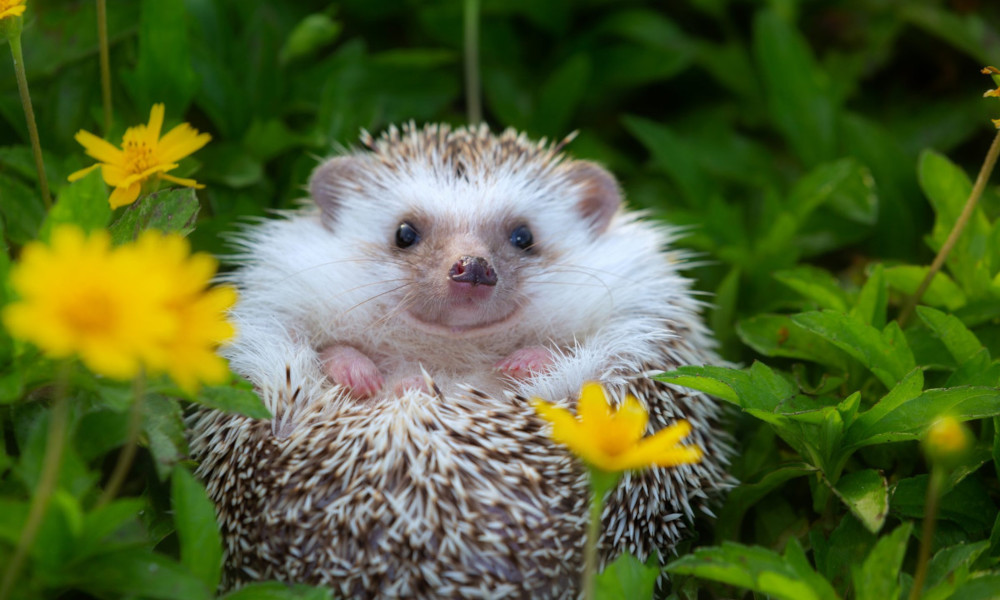

In [3]:
mimg = PImage.open("./data/hog.jpg")
display(mimg)

In [4]:
print(mimg)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x600 at 0x7849B61A9870>


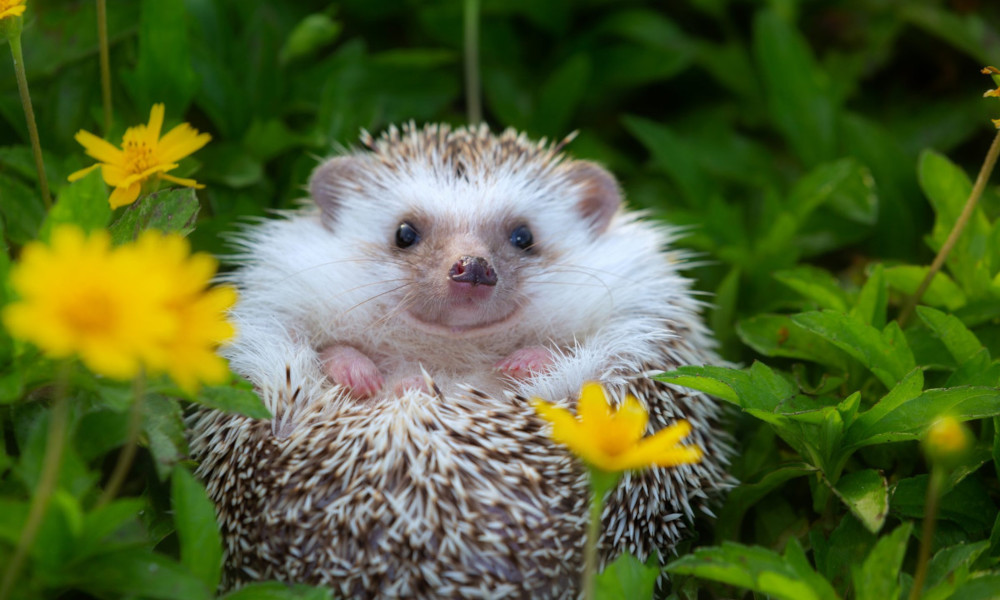

In [5]:
mimg

Now `mimg` is an image object and we can get some information about our image directly from this object.

### Image properties

<img src="./imgs/image-00.jpg" width="720px">

For example, to get its dimensions, in pixels, we can access its `size` variable, which holds $2$ values:

In [6]:
print(mimg.size)
print(mimg.size[0], mimg.size[1])

iw, ih = mimg.size
print(iw, ih)

(1000, 600)
1000 600
1000 600


In [7]:
image_width, image_height = mimg.size

print(image_width, "x", image_height)
print("total number of pixels:", image_width * image_height)

1000 x 600
total number of pixels: 600000


And, to get the number of channels we can call its `getbands()` function:

In [8]:
mimg.getbands()

('R', 'G', 'B')

In [9]:
b0, b1, b2 = mimg.getbands()
print(b2)

B


In [10]:
bands0, bands1 = mimg.getbands()
# ERROR !

ValueError: too many values to unpack (expected 2)

In [ ]:
channel_count = len(mimg.getbands())

print(channel_count, "channels")

### About channels

Grayscale images have $1$ channel: each pixel holds a value between $0$ and $255$ that represents how bright that pixels is.

RGB images have $3$ channels: each pixel is represented by $3$ values, one for each of the colors red, green and blue.

RGBA images have $4$ channels: each pixel has $3$ values for its RGB components, plus an extra one for transparency.

<img src="./imgs/image-01.jpg" width="720px">

This is important because when we get the list of pixels for an image we need to know what to expect from each of the list's members.

### Visualize the image

We can just call the built-in notebook function `display()`

In [ ]:
display(mimg)

### Get info for another image

Either upload a different image to the notebook, or open up the `data/flowers.jpg` image and print out its width, height, total number of pixels and number of channels.

In [ ]:
# TODO: open another image and print its properties
# TODO: display the second image

### Getting pixel color lists

We can also easily get a list of all the pixel color values by calling the object's `getdata()` member function and turning the result into a `list`.

This list has $width \times height$ elements, one for each pixel on the image, and when working with RGB images, each pixel element will have $3$ values.

We can take a look at some pixel values, and check that the length of the pixel array is equal to the $width$ of the image times its $height$.

In [11]:
img_pixels = list(mimg.getdata())
print(len(img_pixels))
img_pixels[0]

600000


/tmp/ipykernel_4123/2602764690.py:1: DeprecationWarning: Image.Image.getdata is deprecated and will be removed in Pillow 14 (2027-10-15). Use get_flattened_data instead.
  img_pixels = list(mimg.getdata())


(216, 152, 3)

In [12]:
img_pixels = list(mimg.getdata())

print(mimg.size, mimg.size[0] * mimg.size[1], len(img_pixels))
print(img_pixels[:5])

(1000, 600) 600000 600000
[(216, 152, 3), (206, 141, 0), (201, 135, 0), (205, 137, 0), (208, 142, 4)]


/tmp/ipykernel_4123/3009725873.py:1: DeprecationWarning: Image.Image.getdata is deprecated and will be removed in Pillow 14 (2027-10-15). Use get_flattened_data instead.
  img_pixels = list(mimg.getdata())


Even though we view our images as two-dimensional arrangements of colors, in memory and in files, they're just long lists of numbers.

<img src="./imgs/image-02.jpg" width="720px">

And, just like with audio files, we can create or manipulate these numeric lists before viewing them as images.

### Creating images from pixel color lists

This is a bit trickier.

We first have to create an empty image with a given size and specific number of channels, and then pass a list of pixel values to fill it:

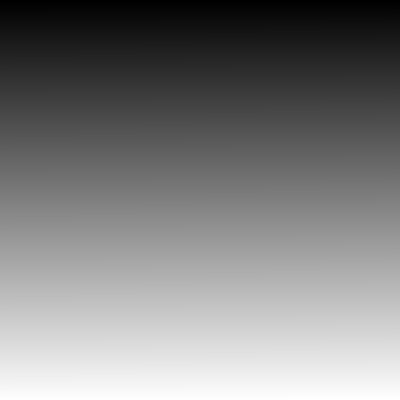

In [13]:
# This creates an empty grayscale image with size 400 x 400
rimg = PImage.new("L", (400, 400))

# This fills a list with 400 * 400 random values between 0 and 255
rpix_vals = []
for i in range(400 * 400):
  rpix_vals.append(int(i/160000 * 255))

# This puts the pixel values into the image object, so we can visualize it
rimg.putdata(rpix_vals)
display(rimg)

### An RGB example

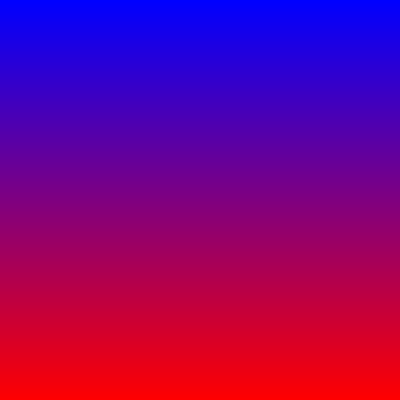

In [14]:
# This creates an empty, 3-channel, RGB image with size 400 x 400
rimg = PImage.new("RGB", (400, 400))

# This fills a list with 400 * 400 RGB values
rpix_vals = []
for i in range(400 * 400):
  r = int(i / 160000 * 255)
  b = 255 - int(i / 160000 * 255)
  rpix_vals.append((r, 0, b))

# This puts the pixel values into the image object, so we can visualize it
rimg.putdata(rpix_vals)
display(rimg)

## 😵‍💫😖

And, just like with audio files and sample lists, it's kind of annoying to always be turning pixels into images and images into pixels like this.

Additionally, if the content of the pixel list passed to the function doesn't match the expected number of pixels or channels, the conversion will fail.

Luckily, we can use some helper functions to make this easier.

### Images and Pixels

We can use the helper functions `get_pixels()` and `make_image()` to convert between pixel arrays and PIL images.

If the `make_image()` function is called with just an array of pixels it will assume we want a square image with equal width and height. To make an image with a more specific size, at least one more parameter has to be used: `make_image(pixels, width, height)`.

or even just: `make_image(pixels, width)` and it will figure out the height automatically.

Something like the example above could look like:

In [ ]:
# This fills a list with 400 * 400 RGB values
rpix_vals = [(int(i / 160000 * 255), 0, 255 - int(i / 160000 * 255)) for i in range(400*400)]

# This creates an image object from the pixel values so we can visualize it

# if we don't give it a width, it assumes a square image
rimg = make_image(rpix_vals)
display(rimg)

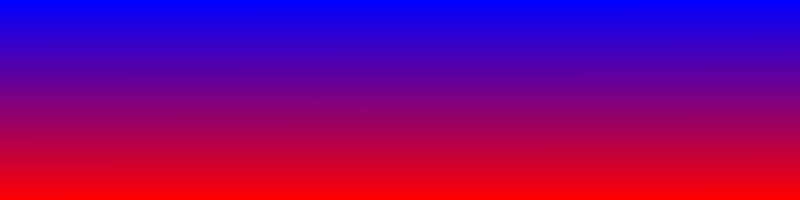

In [15]:
# if we give it a width, it will calculate the height given the number of elements on the list
rimg = make_image(rpix_vals, 800)
display(rimg)

### Updating images

Since the pixel array is a separate object from the `PImage` object, once we change an image's pixel array we have to create a new image to see the results:

In [ ]:
himg = PImage.open("./data/hog.jpg")

himg_copy_pxs = get_pixels(himg)
mid_idx = len(himg_copy_pxs) // 2

for idx in range(0, mid_idx):
  himg_copy_pxs[idx] = himg_copy_pxs[mid_idx + idx]

display(himg)

himg_new_copy = make_image(himg_copy_pxs, himg.size[0])
display(himg_new_copy)

## Processing pixels

### Visualizing color channel

We can create new images by changing the values of the pixels in our list.

For example, if we want to separate the `red` component of our image, we can go through all of the pixel values and remove their `green` and `blue` components.

##Turn into grayscale

In [19]:
himg = PImage.open("./data/hog.jpg")
himg_pxs = get_pixels(himg)
#himg_pxs = list(himg.getdata())

gray_pxs = []

for r,g,b in himg_pxs:
  l = int((r +g + b) / 3)
  gray_pxs.append(l)

  nimg = make_image(gray_pxs, himg.width)

  nimg

KeyboardInterrupt: 

In [ ]:
himg = PImage.open("./data/hog.jpg")
himg_pxs = get_pixels(himg)

# build array of new pixel values
redpxs = []
for r,g,b in himg_pxs:
  redpxs.append((r, 0, 0))

himg = make_image(redpxs, himg.size[0])
display(himg)

### Separating color channel

The above cell removes green and blue color information from our image, but we still have 3-channel pixels.

If we want look at the values of a particular channel separately, we can extract the values from a particular channel and create a grayscale image that represents the strength (brightness) of that channel.

In [ ]:
himg = PImage.open("./data/hog.jpg")
himg_pxs = get_pixels(himg)

# build array with single values from channel we're separating
redpxs = []
for r,g,b in himg_pxs:
  redpxs.append(r)

himg = make_image(redpxs, himg.size[0])
display(himg)

We could've also done the above using a one-line list comprehension expression:

In [ ]:
himg = PImage.open("./data/hog.jpg")
redpxs = [(r, 0, 0) for r,g,b in get_pixels(himg)]

himg = make_image(redpxs, himg.size[0])
display(himg)

In [ ]:
himg = PImage.open("./data/hog.jpg")
redpxs = [r for r,g,b in get_pixels(himg)]

himg = make_image(redpxs, himg.size[0])
display(himg)

### Saving

If we create something we want to keep, we can save an image to a file by calling the `.save()` function of an `Image` object.

In [ ]:
print(himg)

In [ ]:
himg.save("./data/redhog.jpg")

### Remove greens

Go through the original pixels and remove the green pixel values.

In [ ]:
# TODO: remove green CHANNEL
himg = PImage.open("./data/hog.jpg")

In [ ]:
# TODO: removes green PIXELS

### Saturate colors

We can also saturate colors, by increasing the value of a chosen channel in every pixel.

In [ ]:
himg = PImage.open("./data/hog.jpg")
display(himg)

satpxs = []
for r,g,b in get_pixels(himg):
  # if the green channel is greater than the red and blue channels
  if (g - r) > 16 and (g - b) > 16:
    # make the green value 2 times larger
    satpxs.append((r, 2 * g, b))
  # else, keep original pixel values
  else:
    satpxs.append((r, g, b))

himg = make_image(satpxs, himg.size[0])
display(himg)

### Exaggerate the yellows

How can we exaggerate the yellow flowers instead ?

We get yellow when the `red` and `green` values of our pixel are similar and much greater than the `blue` value.

First thing we have to do is detect the yellow pixels, then exaggerate their `red` and `green` values.

In [ ]:
# TODO: exaggerate the yellows
# logic: red is similar to green and both are greater than blue

himg = PImage.open("./data/hog.jpg")

# update pixels here
npxs = []

# then display
himg = make_image(npxs, himg.size[0])
display(himg)

### RGB to grayscale

We can also remove colors by making the pixel have a single value equal to the average of its original RGB values.

$\displaystyle average = \frac{R + G + B}{3}$

This is a good way to estimate the luminosity of each pixel: brighter pixels will be white and darker pixels will be black.

In [ ]:
himg = PImage.open("./data/hog.jpg")

bwpxs = []
for r,g,b in get_pixels(himg):
  gval = (r + g + b) // 3
  bwpxs.append(gval)

himg = make_image(bwpxs, himg.size[0])
display(himg)

### Non-homework assignment

Let's say we want to replicate this effect from *Schindler's List* to highlight a specific color in an image.

<img src="./imgs/red-coat-filter.jpg" width="720px">

The logic could be something like: if pixel is red, keep it, otherwise turn into greyscale.

### For the hedgehog image

We might want to keep the yellow pixels, and turn everything else grey.

In [ ]:
# TODO: keep only yellow pixels, make everything else greyscale

fimg = PImage.open("./data/hog.jpg")

fpxs = []
# TODO: iterate over fimg.pixels and append correct pixel values to fpxs

fimg = make_image(fpxs, fimg.size[0])
display(fimg)

### Filtering by Color

Let's formalize what we mean by filtering and be a bit more precise with what we are trying to do.

Let's say we're working on a vegetation detector and we want to be able to separate the pixels that represent plants and flowers from pixels that represent animals and other things.

We can start by creating a filter to separate the green pixels from our original image.

This is different than looking at the `green` color channel, or removing the `red` and `blue` channels, or exaggerating the green pixels.

In order to filter pixels of a certain color we have to go through the pixels and measure how similar they are to the color we wish to separate.

There are many ways to define "similar" when working with colors, but to keep it simple, let's define a `color_distance()` function that calculates the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between two colors:

$\displaystyle dist = \sqrt{\left(R_0 - R_1\right)^2 + \left(G_0 - G_1\right)^2 + \left(B_0 - B_1\right)^2}$

In [ ]:
def color_distance(c0, c1):
  return ((c0[0] - c1[0])**2 + (c0[1] - c1[1])**2 + (c0[2] - c1[2])**2) ** 0.5

### Removing pixels

Now that we have a function for measuring color similarity we can go through the pixels and remove the ones that are very different from the color we want to keep. We'll remove pixels by turning them black with RGB value (0, 0, 0).

Since we're making some pretty significant changes to our image, let's keep a copy of the original. We can do this by just calling the `copy()` member function of an image object.

In [ ]:
himg = PImage.open("./data/hog.jpg")

keep_color = (20, 180, 20) # green
keep_color = (242, 224, 19) # yellow
thold = 120

filtpxs = []
for r,g,b in get_pixels(himg):
  if color_distance((r, g, b), keep_color) < thold:
    filtpxs.append((r, g, b))
  else:
    filtpxs.append((0, 0, 0))

fimg = make_image(filtpxs, fimg.size[0])

display(himg)
display(fimg)

### Filter other colors

How can we filter the image to keep only the flowers? Or to keep only the hedgehog?

It might help to define a `filter_color()` function here that takes an image and a color to keep as inputs, and returns another image with just the kept pixels and black pixels ... while keeping the original image intact.

In [ ]:
def filter_color(img, keep_color, thold=150):
  # TODO: fill this in
  filtpxs = []

  return make_image(filtpxs, img.size[0])

In [ ]:
himg = PImage.open("./data/hog.jpg")

# TODO: use filter_color to filter image to keep only flowers or to keep only the hedgehog

### Counting pixels by colors

Now that we can separate pixels by color, we could use it to create an automatic deforestation sensor by separating and counting green pixels, and calculating the percentage of green areas on images.

We could implement a separate function to count the number of non-black pixels in an image after it has been filtered, but since our `filter_color()` function above already goes through all of the pixels in an image and detects pixels of specific colors, we can just create a modified version of it that counts those pixels and returns the ratio relative to the total number of pixels, instead of returning a filtered image.

We can call this new function `color_ratio()` and it will take and image, a color and a threshold as parameters, like the `filter_color()` function.

In [ ]:
# TODO: create color_ratio() function

def color_ratio(img, keep_color, thold=150):
  # TODO: modify the content of the filter_color() function
  return 0

We can try it out on a couple of forest images inside the `data/` directory.

In [ ]:
fimg = PImage.open("./data/forest-00.jpg")
display(fimg)

ffimg = filter_color(fimg, (0,200,0), 180)
display(ffimg)

green_ratio = color_ratio(fimg, (0,200,0), 180)
print(f"green %: {round(100 * green_ratio, 3)}")

### Try it out on some other images

There are $6$ other aerial forest images in the `data/` directory. Run the green pixel count code on them and see if the results make sense.

In [ ]:
# TODO: count green pixels in forest images
fimg = PImage.open("./data/forest-01.jpg")
display(fimg)

# TODO: filter by color to get good RGB values

# TODO: use RGB values to calculate color ratio

Once we start doing image analysis it's good to be able to extract different kinds of information from our images in case we want to categorize them, filter them further or retrieve them from large databases later.

This is kind of equivalent to how we extracted amplitude and frequency features from audio files.

### Dominant Channel

One feature we can easily extract from our images is the average value of each of its channels along with the average luminosity value.

This can be used to give us some idea about the dominant color or tones in an images.

In [ ]:
himg = PImage.open("./data/hog.jpg")
himg_pxs = get_pixels(himg)

# array with 4 0s
hog_rgbl_sum = 4 * [0]

for r,g,b in himg_pxs:
  l = (r + g + b) // 3
  hog_rgbl_sum[0] += r
  hog_rgbl_sum[1] += g
  hog_rgbl_sum[2] += b
  hog_rgbl_sum[3] += l

hog_rgbl_avg = [s // len(himg_pxs) for s in hog_rgbl_sum]

print("average RGBL values", hog_rgbl_avg)

We can see that both the `green` and `red` channels have average values above the average luminosity value.

This makes sense since the image has a lot of green pixels, and the `red` channel contributes to the yellow and white pixels.

### Repeat for other image

Get the average value for each channel of a different image.

Maybe create a function...

Does the result make sense?

In [ ]:
# TODO: get average channel value for other image

def get_channel_avgs(img):
  # TODO: fill this in
  return []

In [ ]:
# TODO: run function on image and print channel average values

In [ ]:
# TODO: run function on another image and print channel average values

### Edge Detection

We've looked at some techniques for getting color information from images, but images are more than just colors.

We might be interested in also quantifying the shapes and textures present in our images.

We can start by extracting the edges of shapes in our image. There are many ways of doing this, but the simplest way is to subtract our original image from a blurry version of it and threshold the result.

Since we are not so concerned with color at this point we should work with grayscale images.

Our overall algorithm will be something like:
- open an image
- make it black & white
- blur it
- subtract the blurry b&w pixels from the original b&w pixels
- threshold the result

Threshold means making slightly bright pixels really bright and all other pixels really dark.

Let's do this in steps:

#### Open an image and extract its pixels

We can use the `PImage.open()` and the `get_pixels()` functions to open and extract pixels.

In [ ]:
# TODO: implement edge extraction algorithm
# TODO: open an image and extract its pixels

mimg = '''image goes here'''
ipxs = '''pixels goes here'''

display(mimg)

#### Blur the image using `blur()`

And display it.

The `blur()` function takes an image object as a parameter and an optional second parameter that specifies the amount of blurring. It returns another image object.

Experiment with the parameter a little bit, but the default value is good for extracting edges.

Let's also get the pixels for the blurred image and display it with `display()`.

In [ ]:
# TODO: implement edge extraction algorithm
# TODO: blur image with the blur() function

bimg = ''''''
bpxs = ''''''

display(bimg)

#### Make the images grayscale

We saw this a few cells back. We can average the `RGB` values to get a grey luminance value.

Get grayscale versions of the original image and the blurry image

Display the results.

In [ ]:
# TODO: implement edge extraction algorithm
# TODO: make the image b&w

# TODO: make pixels and blurry pixels b&w
bwpxs = ''''''
bwbpxs = ''''''

bwimg = make_image(bwpxs, mimg.size[0])
display(bwimg)

bwbimg = make_image(bwbpxs, bimg.size[0])
display(bwbimg)

#### Subtract the blurred pixels from the original pixel values

The `zip()` function might help iterate through the pixel arrays from both images at the same time.

Display the resulting image.

In [ ]:
# TODO: implement edge extraction algorithm
# TODO: subtract blurry b&w image from original b&w image

# TODO: subtract bwbpxs from bwpxs
spxs = ''''''

simg = make_image(spxs, bwimg.size[0])
display(simg)

#### Threshold the resulting pixel values

We'll go through the array and check each pixel:<br>
if its luminance is greater than a threshold value, we'll make it $255$, otherwise we'll make it $0$.

We can start with a threshold value of $16$ and see what happens.

In [ ]:
# TODO: implement edge extraction algorithm
# TODO: threshold pixel values

# TODO: threshold pixels
tpxs = ''''''

timg = make_image(tpxs, simg.size[0])
display(timg)

Great !

### Let's repeat it for a different image

First, create a function that takes an image as a parameter and returns another image with edge information.

We just have to wrap up the previous steps into a function. It will be shorter since we don't have to display all the images along the way. That was only while debugging the logic.

In [ ]:
# TODO: create edge extraction function

def edge(img, rad=1, thold=16):
  # TODO: fill this in
  bimg = '''blurry image'''
  bwpxs = '''b&w pixels'''
  bbwpxs = '''blurry b&w pixels'''

  dpxs = '''difference between b&w and blurry-b&w pixels'''
  tpxs = '''threshold-ed difference'''

  return make_image(tpxs, img.size[0])

In [ ]:
# TODO: test function on a couple of images using different parameters

### Count edges

It helps to have a single value that we can use to compare edge information between images.

Let's create a function that counts the number of white pixels in an edge-extraction image.

We'll divide this number by the number of pixels in the image to get a rough idea of how _edgy_ any image is.

In [ ]:
def edge_ratio(img, rad=1, thold=16):
  eimg = edge(img, rad=rad, thold=thold)
  eimg_pxs = get_pixels(eimg)
  sum255 = sum([1 for L in eimg_pxs if L > 250])
  npxs = len(eimg_pxs)
  return sum255 / npxs

mimg = PImage.open("./data/hog.jpg")
display(edge(mimg, 2))
round(100*edge_ratio(mimg, 2), 4)

### Count edges for different images

Do the results make sense? Why did we divide the sum by the total number of pixels?

In [ ]:
# TODO: run the edge_ratio() function on a few images and compare results.
# TODO: do the results make sense ? (i.e. do images with more "things" have more edges ?)